In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\raw_analyst_ratings.csv')

# Display the first few rows
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


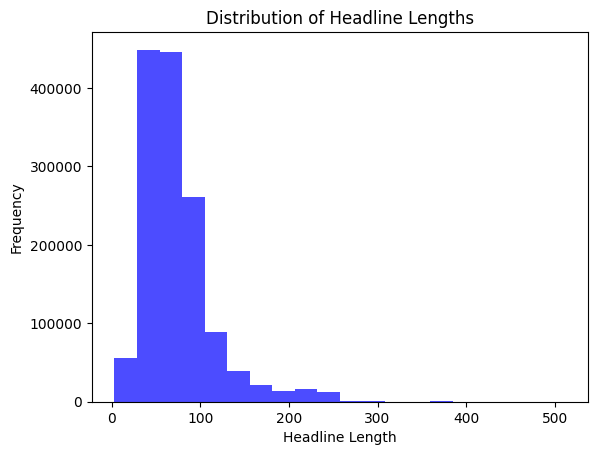

In [2]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Summary statistics for headline lengths
print("Headline Length Statistics:")
print(df['headline_length'].describe())

# Visualize the distribution of headline lengths
plt.hist(df['headline_length'], bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


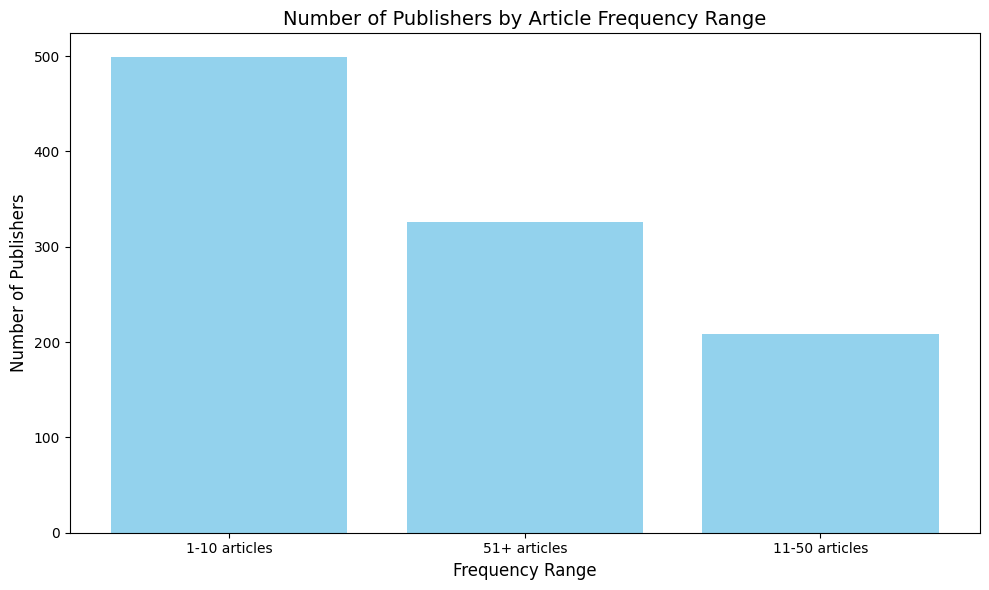

In [3]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("Number of Articles per Publisher:")
print(publisher_counts)

# Visualize publisher activity

bins = [0, 10, 50, float('inf')]
labels = ['1-10 articles', '11-50 articles', '51+ articles']

# Group publishers by frequency range
publisher_groups = pd.cut(publisher_counts, bins=bins, labels=labels, right=False)
grouped_data = publisher_groups.value_counts()

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', alpha=0.9)

# Add titles and labels
plt.title('Number of Publishers by Article Frequency Range', fontsize=14)
plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Number of Publishers', fontsize=12)
plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_12296\3669237567.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


Articles Published Per Month:
year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


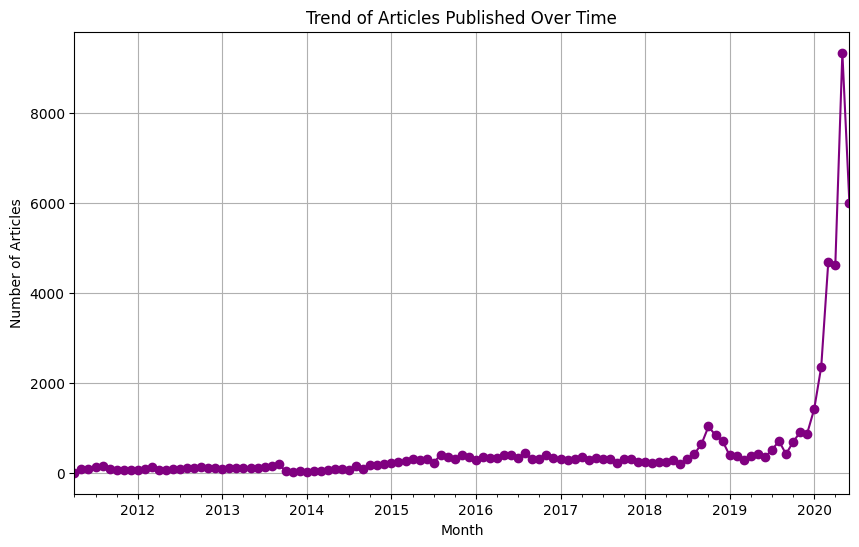

In [5]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract publication year and month
df['year_month'] = df['date'].dt.to_period('M')

# Count articles per month
articles_per_month = df['year_month'].value_counts().sort_index()

print("Articles Published Per Month:")
print(articles_per_month)

# Visualize publication trends over time
articles_per_month.plot(kind='line', figsize=(10, 6), marker='o', color='purple')
plt.title('Trend of Articles Published Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


Articles Published by Day of the Week:
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


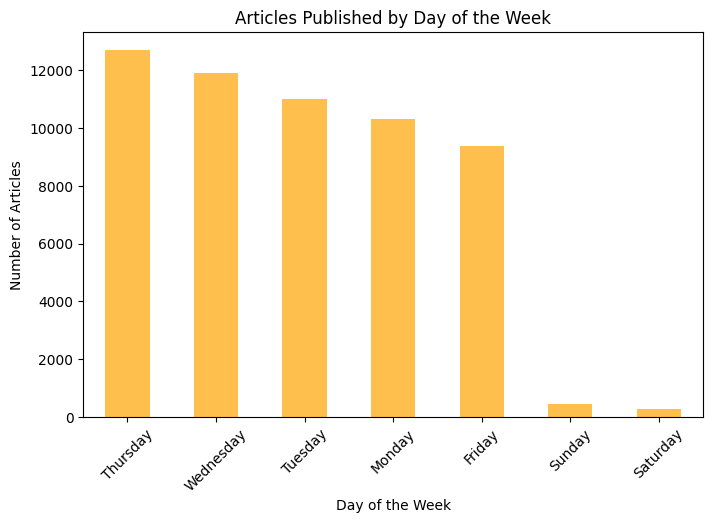

In [6]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Count articles by day of the week
day_counts = df['day_of_week'].value_counts()

print("Articles Published by Day of the Week:")
print(day_counts)

# Visualize articles by day of the week
day_counts.plot(kind='bar', figsize=(8, 5), color='orange', alpha=0.7)
plt.title('Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


Articles Published Per Day:
date
2011-04-27 21:01:48-04:00    1
2011-04-28 13:49:29-04:00    1
2011-04-28 15:00:36-04:00    1
2011-04-29 13:47:06-04:00    1
2011-04-29 16:11:05-04:00    1
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Name: count, Length: 36011, dtype: int64


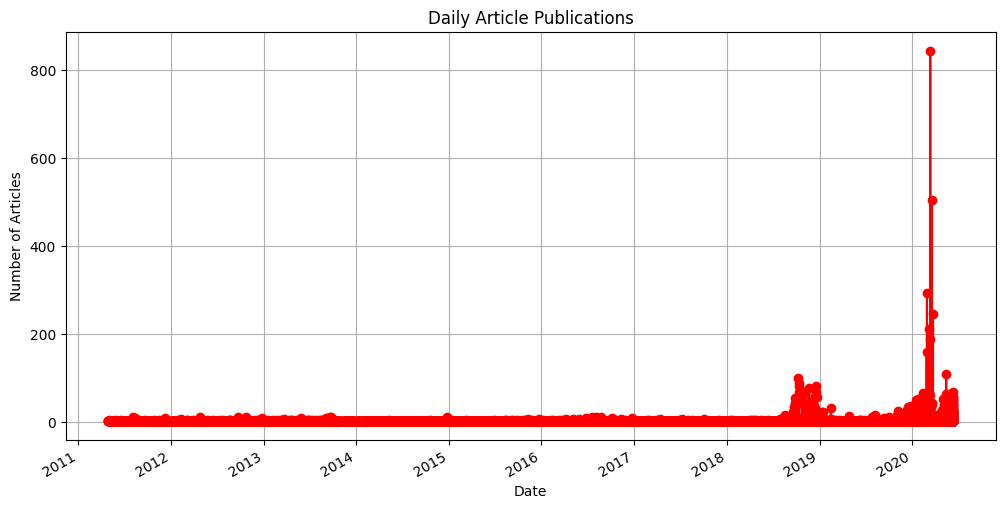

In [7]:
# Group articles by specific dates to identify spikes
articles_per_day = df['date'].value_counts().sort_index()

print("Articles Published Per Day:")
print(articles_per_day)

# Visualize spikes
articles_per_day.plot(kind='line', figsize=(12, 6), marker='o', color='red')
plt.title('Daily Article Publications')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [8]:
# Filter articles during a known event date range (with high publication)
event_period = df[(df['date'] >= '2020-05-01') & (df['date'] <= '2020-05-31')]

# Count publishers active during the event
print(event_period['publisher'].value_counts())


publisher
Benzinga Newsdesk                 2929
Lisa Levin                        1434
Benzinga Insights                 1066
Benzinga Newsdesk                 1025
Vick Meyer                         825
vishwanath@benzinga.com            701
Benzinga_Newsdesk                  431
Shanthi Rexaline                   328
Charles Gross                      105
Luke J Jacobi                       81
Wayne Duggan                        55
Tanzeel Akhtar                      37
ETF Professor                       35
Elizabeth Balboa                    33
Craig Jones                         30
Nelson Hem                          27
Jose Rodrigo Safdiye                25
Jayson Derrick                      19
JJ Kinahan                          18
Shivdeep Dhaliwal                   18
Priya Nigam                         16
Neer Varshney                       14
Direxion                            11
Tyree Gorges                        10
Spencer Israel                       6
Renato Capelj  

Starting sentiment analysis...



00%|██████████████████████████████████████████████████████████████████████████████████████████| 1407328/1407328 [06:02<00:00, 3883.54it/s]

Sentiment analysis completed.
sentiment
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


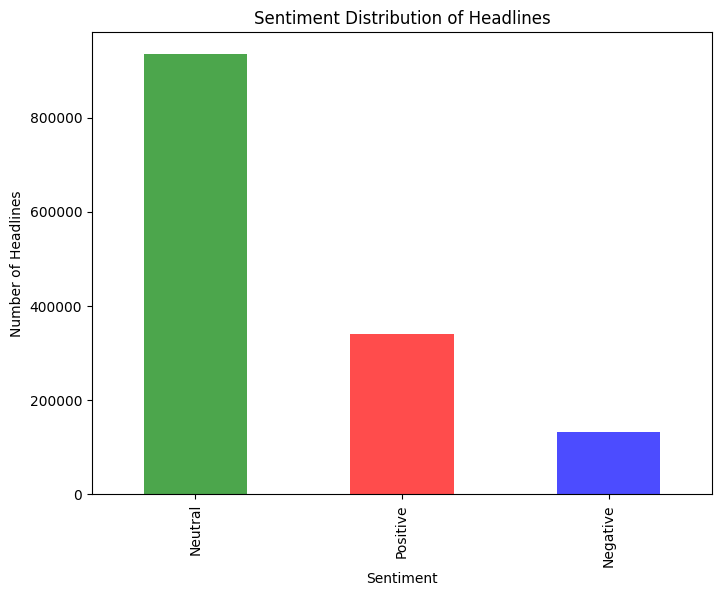

In [9]:
from textblob import TextBlob
import pandas as pd
from tqdm import tqdm

# Enable tqdm for progress tracking
tqdm.pandas()

# Handle missing data
df['headline'] = df['headline'].fillna('')

# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis with a progress bar
print("Starting sentiment analysis...")
df['sentiment'] = df['headline'].progress_apply(get_sentiment)
print("Sentiment analysis completed.")

# Summarize sentiment
print(df['sentiment'].value_counts())

# Visualize sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7, figsize=(8, 6))
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()


       Keyword   Count
0    announces   66513
1          buy   43697
2   downgrades   61862
3     earnings   80855
4          eps  127403
5          est   49316
6    maintains   52958
7       market   89225
8          new   47662
9        price   63328
10          pt   72733
11      raises   57735
12     reports  108429
13       sales   77924
14     session   43513
15      shares  112655
16      stocks  159102
17      target   53530
18     trading   60582
19          vs  138801


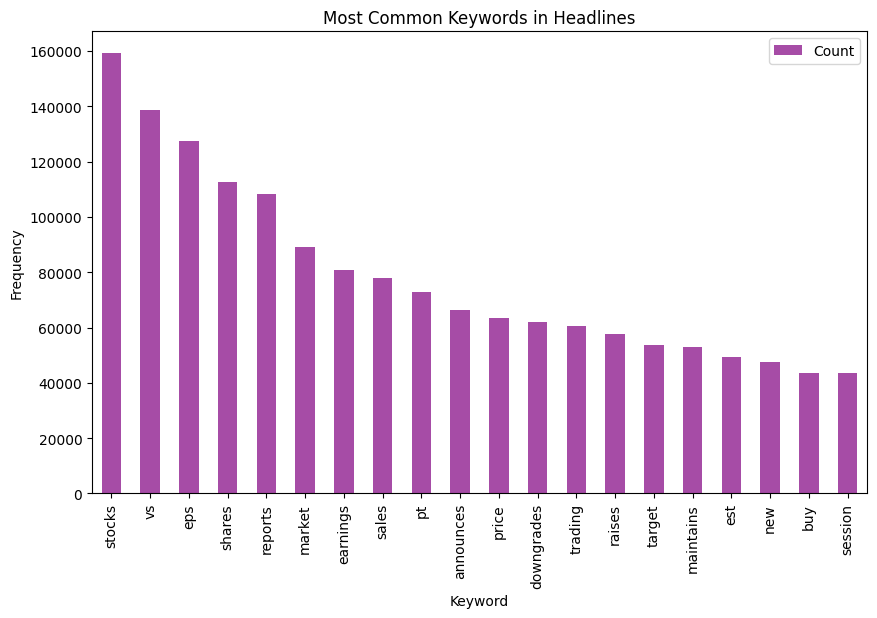

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Clean the headlines by removing stopwords, punctuation, etc.
def clean_text(text):
    return ' '.join([word.lower() for word in text.split() if word.isalpha()])

df['cleaned_headline'] = df['headline'].apply(clean_text)

# Extract common keywords
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_headline'])
keywords = vectorizer.get_feature_names_out()

# Count occurrences
keyword_counts = np.asarray(X.sum(axis=0)).flatten()

# Convert to DataFrame for better representation
keywords_df = pd.DataFrame({'Keyword': keywords, 'Count': keyword_counts})
print(keywords_df)

# Visualize top keywords
keywords_df = keywords_df.sort_values(by='Count', ascending=False)
keywords_df.plot(kind='bar', x='Keyword', y='Count', figsize=(10, 6), color='purple', alpha=0.7)
plt.title('Most Common Keywords in Headlines')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Check if 'headline' column exists
if 'headline' in df.columns:
    # Clean the text data
    def clean_text(text):
        return ' '.join([word.lower() for word in str(text).split() if word.isalpha()])
    
    # Create 'cleaned_headline'
    df['cleaned_headline'] = df['headline'].apply(clean_text)
else:
    raise KeyError("The dataset does not have a 'headline' column.")

# Sample data if the dataset is large
df_sample = df.sample(n=1000, random_state=42)  # Use a subset for testing

# Vectorize the text using TF-IDF with fewer features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df_sample['cleaned_headline'])

# Apply LDA with multithreading and verbose output
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, verbose=1)
lda.fit(tfidf)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display top words in each topic
no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, no_top_words)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topic 1:
eps sees shares sales vs industry reports market highest energy
Topic 2:
stocks session moving new set watch high september november markets
Topic 3:
earnings scheduled raises pt buy announces initiates maintains upgrades price
Topic 4:
vs eps reports sales est target price hit downgrades maintains
Topic 5:
market movers biggest morning shares losers etfs yesterday growth analyst


In [12]:
positive_headlines = df[df['sentiment'] == 'Positive']['cleaned_headline']
negative_headlines = df[df['sentiment'] == 'Negative']['cleaned_headline']


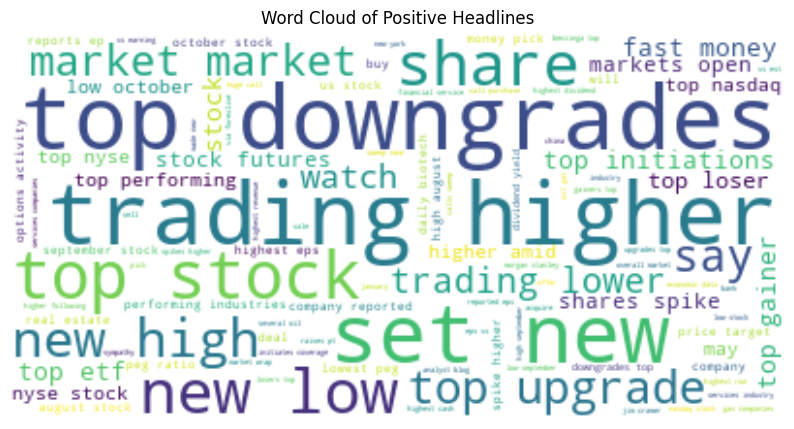

In [13]:
from wordcloud import WordCloud

# Generate word cloud for positive headlines
positive_text = " ".join(positive_headlines)
wordcloud = WordCloud(background_color='white', max_words=100).generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Headlines')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12296\1477089278.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_publications = df['date'].dt.to_period('M').value_counts().sort_index()


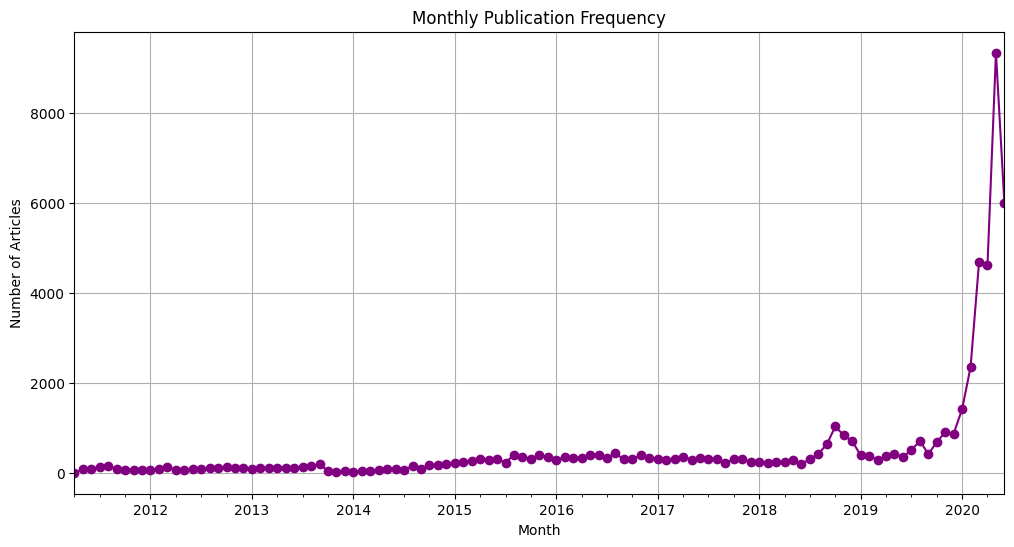

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by month and count publications
monthly_publications = df['date'].dt.to_period('M').value_counts().sort_index()

# Plot publication frequency over time
plt.figure(figsize=(12, 6))
monthly_publications.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()



In [16]:
import pandas as pd

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Count publications per day
daily_publications = df['date'].dt.to_period('D').value_counts().sort_index()

# Identify the top 5 days with the highest publications
top_days = daily_publications.sort_values(ascending=False).head(5)
print("Top Publication Days:")
print(top_days)

# Filter data for these days
spike_dates = top_days.index.astype(str).tolist()
spike_data = df[df['date'].dt.strftime('%Y-%m-%d').isin(spike_dates)]

# Display sample headlines from those days
print("Sample Headlines During Spikes:")
print(spike_data[['date', 'headline']].head(10))


C:\Users\HP\AppData\Local\Temp\ipykernel_12296\3115478154.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  daily_publications = df['date'].dt.to_period('D').value_counts().sort_index()


Top Publication Days:
date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
Freq: D, Name: count, dtype: int64
Sample Headlines During Spikes:
                          date  \
0    2020-06-05 10:30:54-04:00   
1433 2020-06-09 10:52:15-04:00   
1434 2020-06-08 11:29:29-04:00   
1435 2020-06-08 10:32:42-04:00   
1436 2020-06-05 07:40:08-04:00   
4336 2020-06-10 11:21:01-04:00   
4337 2020-06-10 10:40:41-04:00   
4338 2020-06-10 10:35:12-04:00   
4339 2020-06-10 10:28:47-04:00   
4340 2020-06-10 10:24:00-04:00   

                                               headline  
0               Stocks That Hit 52-Week Highs On Friday  
1433  Shares of several basic material companies are...  
1434  Alcoa Seeing Better July Aluminum Shipments Am...  
1435  Shares of several basic materials companies ar...  
1436  10 Basic Materials Stocks Moving In Friday's P...  
4336  International Air Travel On U.S. Airlines Fell...  
4337  Shares of several airline com

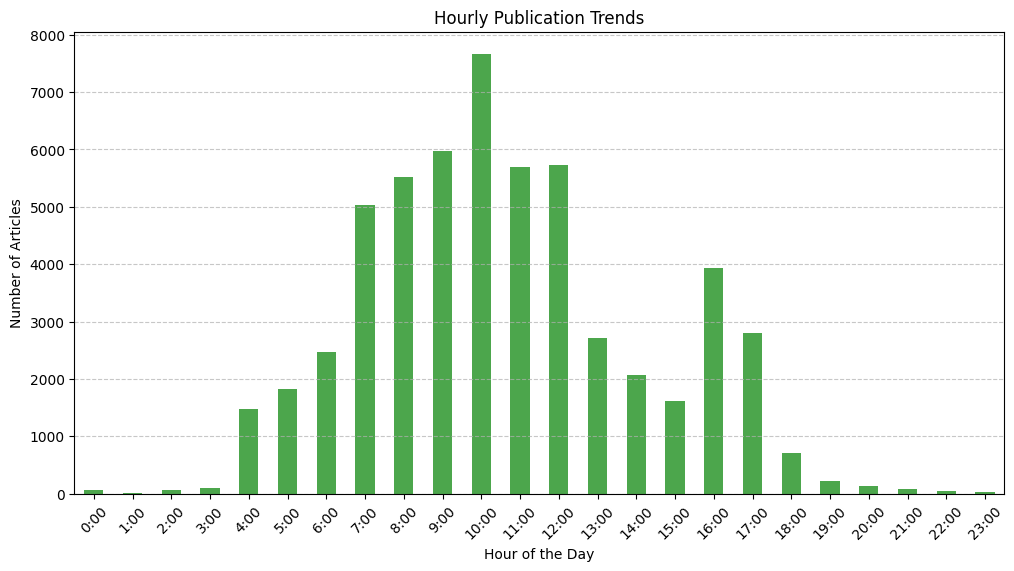

In [17]:
# Extract hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Group by hour and count publications
hourly_publications = df['hour'].value_counts().sort_index()

# Plot hourly publication trends
plt.figure(figsize=(12, 6))
hourly_publications.plot(kind='bar', color='green', alpha=0.7)
plt.title('Hourly Publication Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


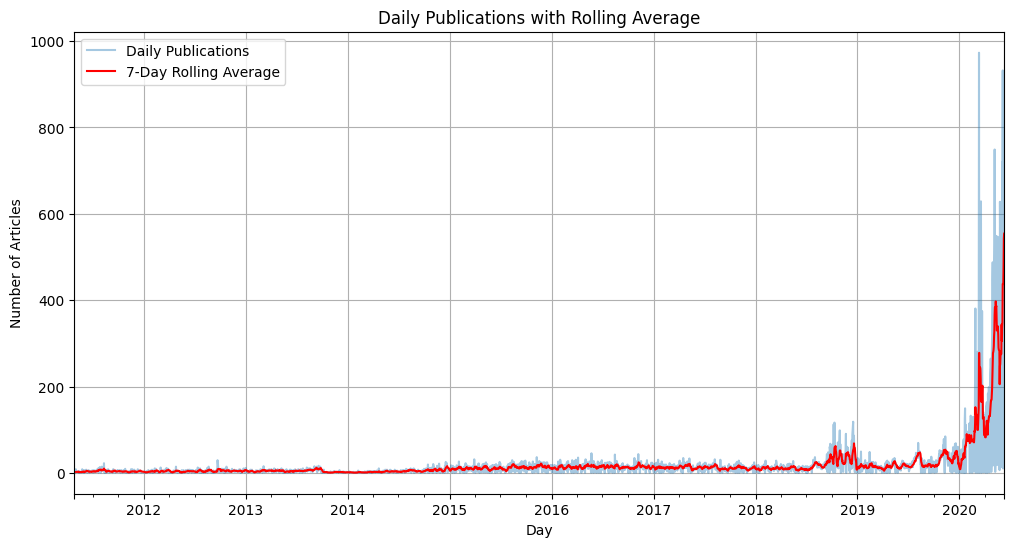

In [18]:
# Calculate rolling average (e.g., 7-day rolling window for daily data)
rolling_avg = daily_publications.rolling(window=7).mean()

# Plot rolling average
plt.figure(figsize=(12, 6))
daily_publications.plot(kind='line', alpha=0.4, label='Daily Publications')
rolling_avg.plot(kind='line', color='red', label='7-Day Rolling Average')
plt.title('Daily Publications with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


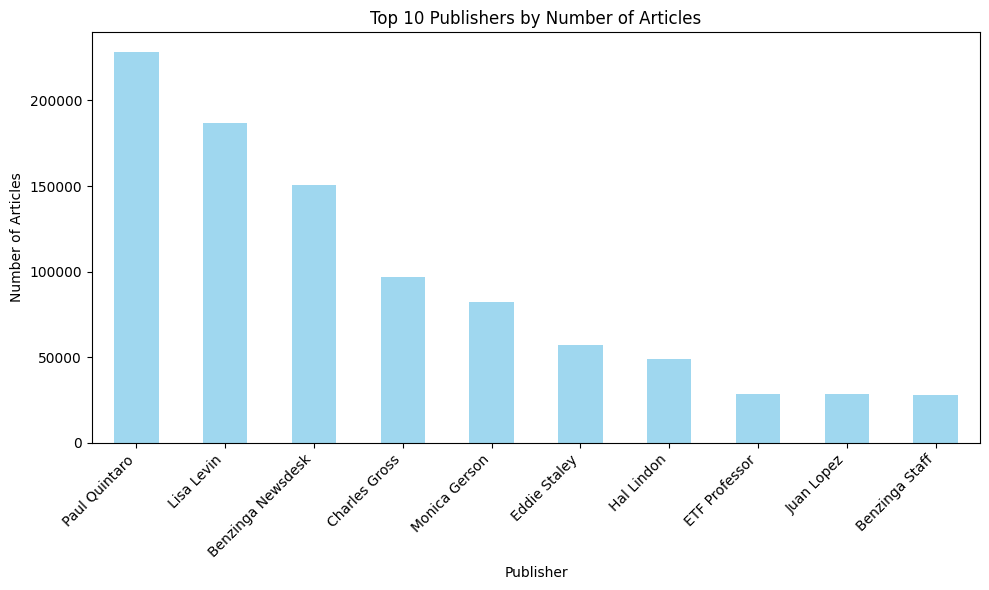

In [19]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display top publishers
print("Top Publishers:")
print(publisher_counts.head(10))

# Visualize top publishers
import matplotlib.pyplot as plt

top_publishers = publisher_counts.head(10)
top_publishers.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.8)
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


News Types by Publisher:
sentiment           Negative  Neutral  Positive
publisher                                      
47ertrends                 0       18         0
AARP                       0        2         5
ABNNewswire                8        5         0
Aakin                      0        1         4
Aaron Jackson.Ed           1        0        15
Aaron Levitt              13      225        57
Abe Raymond              101     1141       222
Abhi Rao                  29       89        28
Abigail Field              1       17         6
Above Average Odds         1       11         8
Accointing                 0        2         0
Activist Stocks            0       28         5
Adam Gefvert               0        1         2
Adam Parker                1       24         0
Adam Sarhan                0        4         0
Adam Weiner                0        1         0
Alan Brochstein            0        6         1
Alex Biles                11      173        77
Alex Cho       

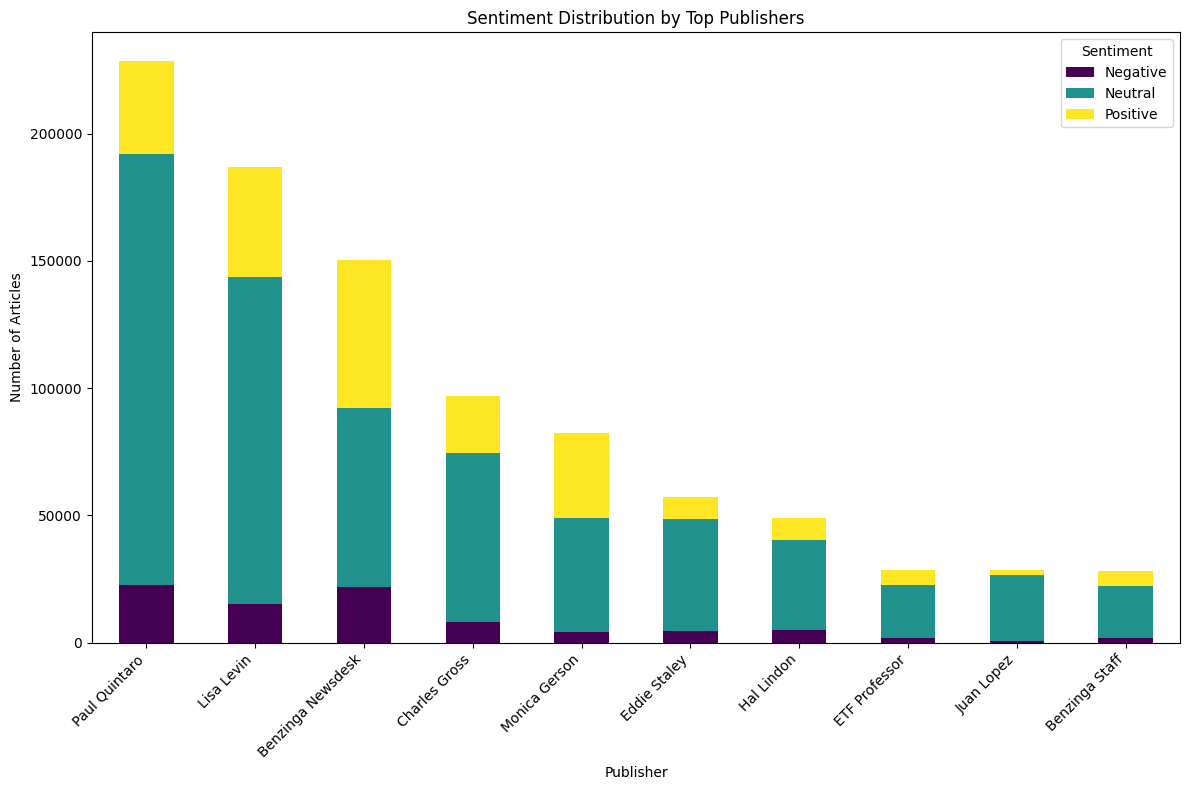

In [21]:
# Group by publisher and sentiment to see the type of news reported
publisher_sentiment = df.groupby(['publisher', 'sentiment']).size().unstack(fill_value=0)

print("News Types by Publisher:")
print(publisher_sentiment.head(20))

# Visualize sentiment distribution for top publishers
top_publishers_sentiment = publisher_sentiment.loc[top_publishers.index]
top_publishers_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution by Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Top Domains from Email Publishers:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


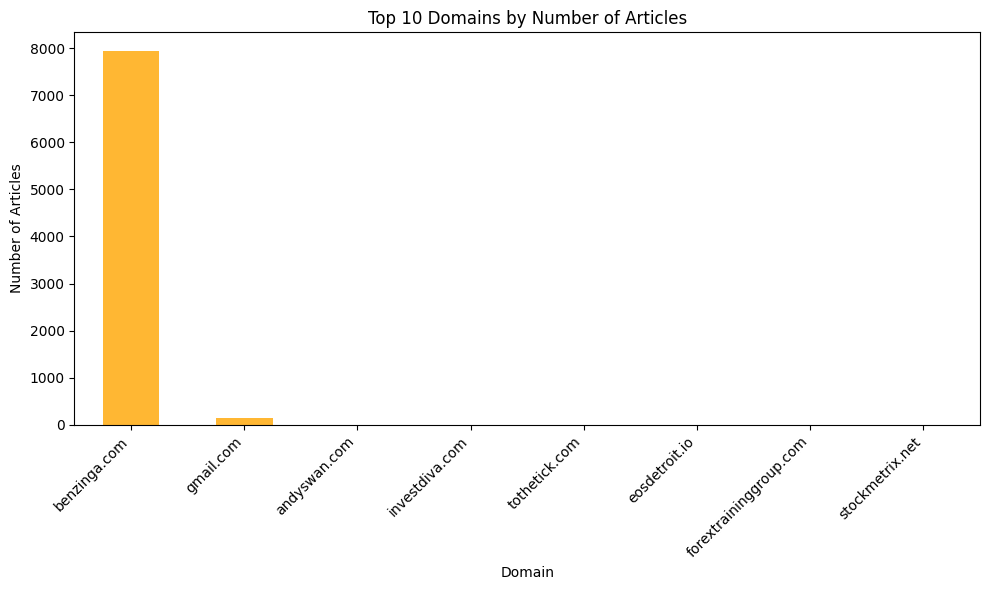

In [22]:
import re

# Identify publishers that are email addresses
email_publishers = df['publisher'].str.contains(r'@\w+\.\w+', na=False)

# Extract domains from email addresses
df['publisher_domain'] = df.loc[email_publishers, 'publisher'].apply(
    lambda x: re.search(r'@([\w.-]+)', x).group(1) if pd.notna(x) else None
)

# Count articles by domain
domain_counts = df['publisher_domain'].value_counts()

print("Top Domains from Email Publishers:")
print(domain_counts.head(10))

# Visualize top domains
domain_counts.head(10).plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8)
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
